# 1. Resíduos Ponderados 01

Problema:
$$
\left \{ \begin{matrix} 
\frac{d^2 u}{dx^2} + \frac{du}{dx} + x = 0 \quad \ x \in [0, 1] \\
u(0) = 0 \\
u(1) = 0
\end{matrix}\right.
$$

In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams.update({
    "text.usetex": True,
    "font.size": 14,
    "figure.figsize": (8,6),
    "figure.dpi": 150,
    "figure.facecolor":'white'})
    

In [5]:
# Funções para plots
def plotexpr(u1,interv,label1):
    p1 = plot(u1,interv, label = label1, legend = true, grid= true, show = false)
    p1.show()
    return p1

def plot2expr(u1,u2,interv,N,label1,label2):
    xp = np.linspace(0, 1, num=N)
    f1 = lambdify(x, u1, "numpy")
    f2 = lambdify(x, u2, "numpy")

    fig, ax = plt.subplots()  # Create a figure and an axes.
    ax.plot(xp, f1(xp), 'b', label=label1)  # Plot some data on the axes.
    ax.plot(xp, f2(xp), 'r--',label=label2)  # Plot more data on the axes...

    ax.set_xlabel('x')  # Add an x-label to the axes.
    ax.set_ylabel('f(x)')  # Add a y-label to the axes.
    # ax.set_title("Simple Plot")  # Add a title to the axes.
    ax.grid()
    ax.legend()  # Add a legend.
    
    return fig,ax

def plot3expr(u1,u2,u3,interv,N,label1,label2,label3):
    xp = np.linspace(0, 1, num=N)
    f1 = lambdify(x, u1, "numpy")
    f2 = lambdify(x, u2, "numpy")
    f3 = lambdify(x, u3, "numpy")

    fig, ax = plt.subplots()  # Create a figure and an axes.
    ax.plot(xp, f1(xp), 'b', label=label1)  # Plot some data on the axes.
    ax.plot(xp, f2(xp), 'r--',label=label2)  # Plot more data on the axes...
    ax.plot(xp, f3(xp), 'g:',label=label3)  # Plot more data on the axes...

    ax.set_xlabel('x')  # Add an x-label to the axes.
    ax.set_ylabel('f(x)')  # Add a y-label to the axes.
    # ax.set_title("Simple Plot")  # Add a title to the axes.
    ax.grid()
    ax.legend()  # Add a legend.
    
    return fig,ax

def plot4expr(u1,u2,u3,u4,interv,N,label1,label2,label3,label4):
    xp = np.linspace(0, 1, num=N)
    f1 = lambdify(x, u1, "numpy")
    f2 = lambdify(x, u2, "numpy")
    f3 = lambdify(x, u3, "numpy")
    f4 = lambdify(x, u4, "numpy")

    fig, ax = plt.subplots()  # Create a figure and an axes.
    ax.plot(xp, f1(xp), 'b', label=label1)  # Plot some data on the axes.
    ax.plot(xp, f2(xp), 'r--',label=label2)  # Plot more data on the axes...
    ax.plot(xp, f3(xp), 'g:',label=label3)  # Plot more data on the axes...
    ax.plot(xp, f4(xp), 'k-.',label=label4)  # Plot more data on the axes...

    ax.set_xlabel('x')  # Add an x-label to the axes.
    ax.set_ylabel('f(x)')  # Add a y-label to the axes.
    # ax.set_title("Simple Plot")  # Add a title to the axes.
    ax.grid()
    ax.legend()  # Add a legend.
    
    return fig,ax

In [3]:
## Definindo as variaveis simbolicas
x, a1, a2 = symbols('x a1 a2')

In [4]:
# Solução analitica
Y = - exp(-x+1)/(2*(1-exp(1))) + (- x**2/2 + x) + exp(1)/(2*(1-exp(1)))
display(Y)

-x**2/2 + x - exp(1 - x)/(2 - 2*E) + E/(2 - 2*E)

## **a)**:

$$
\begin{matrix}
\phi_0 = 0, \\
\phi_1 = x(1-x), \\
\phi_2 = x^2(1-x)
\end{matrix} 
$$

In [6]:
## Definindo o intervalo de integração:
Li = 0
Lf = 1

In [7]:
## Definindo as funções aproximadoras

Fi0 = 0
Fi1 = x*(1-x)
Fi2 = x**2*(1-x)
Fi = Fi0 + a1*Fi1 + a2*Fi2
# display(Fi0)
# display(Fi1)
# display(Fi2)
display(Fi)

## Definindo o resíduo
Rf = lambda F: diff(F,x,2) + diff(F,x) + x


a1*x*(1 - x) + a2*x**2*(1 - x)

In [8]:
# Calculo do resíduo na forma forte
R = Rf(Fi)
display(R)
simplify(R)

-a1*x + a1*(1 - x) - a2*x**2 + 2*a2*x*(1 - x) + x - 2*(a1 + 2*a2*x + a2*(x - 1))

-2*a1*x - a1 - 3*a2*x**2 - 4*a2*x + 2*a2 + x

In [9]:
# Integrais do MRP com Galerkin
I1 = integrate(R*Fi1,(x,Li,Lf))
I2 = integrate(R*Fi2,(x,Li,Lf))

In [10]:
# Solução das equações
a = list(linsolve([I1, I2], (a1,a2)))[0]
a1h = a[0]
a2h = a[1]
a1h, a2h

(13/61, 5/61)

In [11]:
# Função aproximada final
Fih = Fi0 + a1h*Fi1 + a2h*Fi2
Fih

5*x**2*(1 - x)/61 + 13*x*(1 - x)/61

In [12]:
# Resíduos
Rh = Rf(Fih)
Ru = Rf(Y)

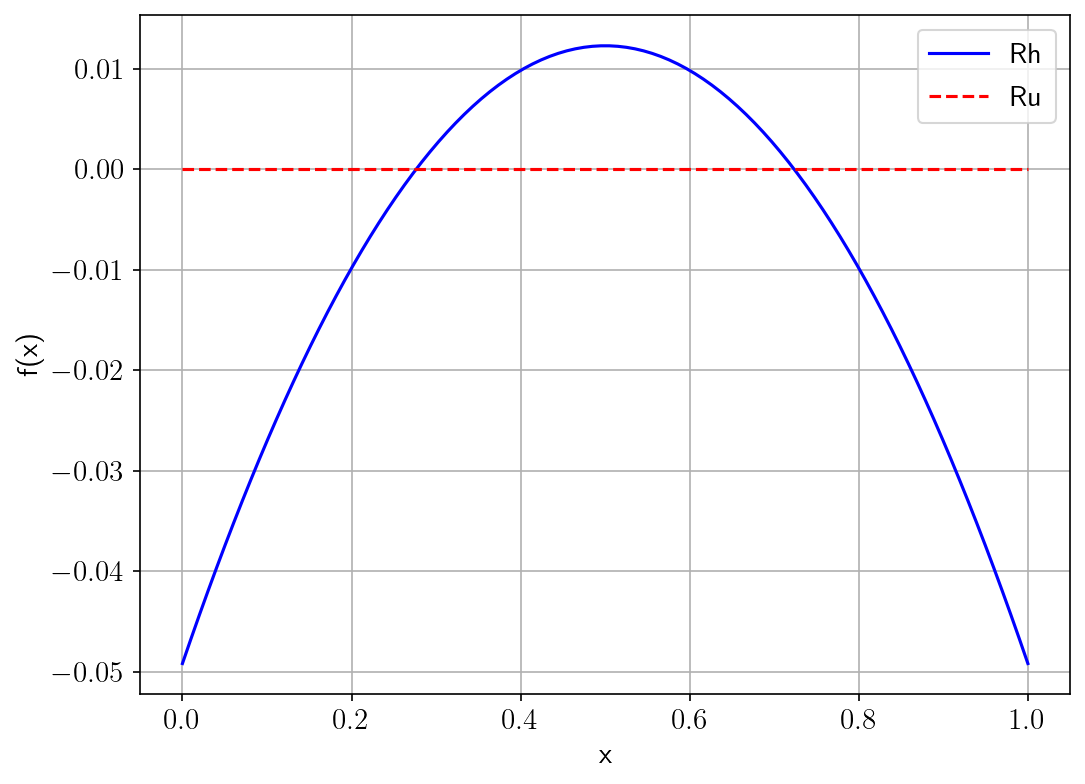

In [13]:
# Comparação do plot dos resíduos da aproximada e da analitica
p = plot2expr(Rh,Ru,(x,0,1),100,'Rh','Ru')

## **b)** Encontre uma solução aproximada usando a forma fraca e funções de aproximação e ponderadoras do mesmo tipo.

In [14]:
# Resíduo na forma fraca
L1 = lambda F: diff(F,x) + F + x**2/2
Rb = L1(Fi)
Rb

a1*x*(1 - x) - a1*x + a1*(1 - x) + a2*x**2*(1 - x) - a2*x**2 + 2*a2*x*(1 - x) + x**2/2

In [15]:
# Integrais do MRP na forma fraca
I1f = integrate(Rb*diff(Fi1),(x,Li,Lf))
I2f = integrate(Rb*diff(Fi2),(x,Li,Lf))

In [17]:
# Solução das equações para encontrar as constantes alfa
af = list(linsolve([I1f, I2f], (a1,a2)))[0]
a1f = af[0]
a2f = af[1]
a1f,a2f

(13/61, 5/61)

In [18]:
# Função aproximada pela forma fraca
Fif = Fi0 + a1f*Fi1 + a2f*Fi2
Fif

5*x**2*(1 - x)/61 + 13*x*(1 - x)/61

## **c)** Compare as soluções obtidas e analise a consistência dos resultados

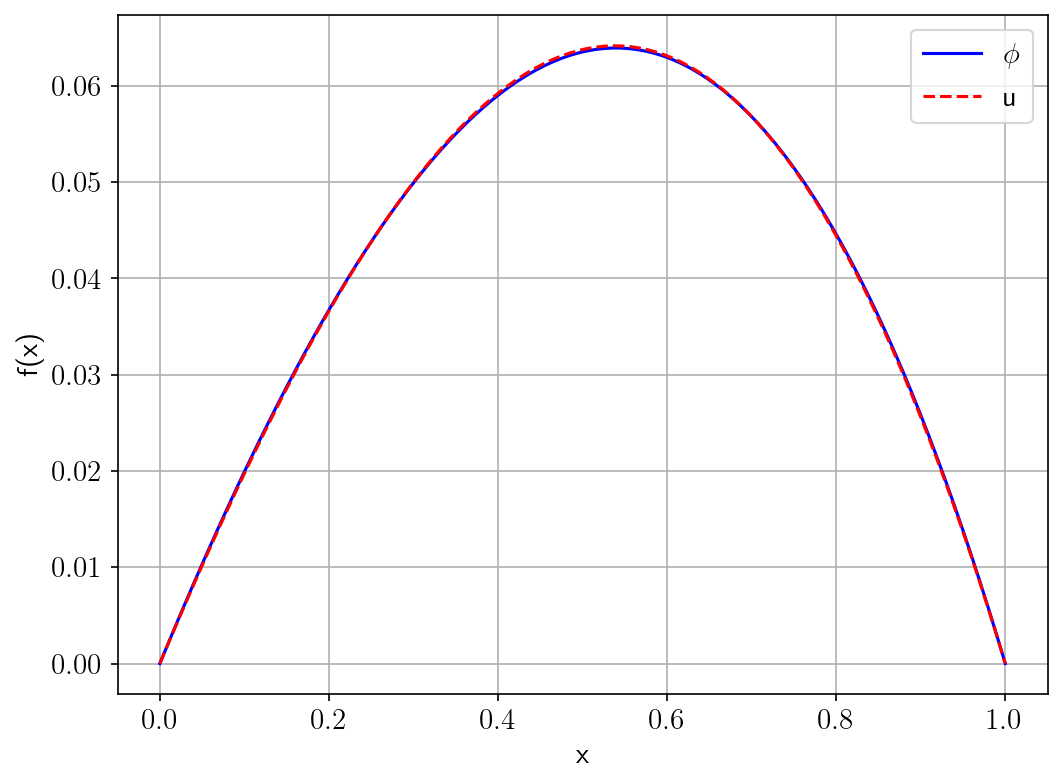

In [19]:
f,ax = plot2expr(Fih,Y,(x,0,1),100,'$\phi$','u')